In [26]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [27]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler # Feature Scaling
from sklearn.metrics import confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout


In [29]:
dataset = pd.read_csv('/Users/prajwal/Developer/Prep/Deep_Learning/Churn_Modelling/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [31]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [32]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [33]:
geography = pd.get_dummies(X['Geography'], drop_first= True)

In [34]:
gender = pd.get_dummies(X['Gender'], drop_first= True)

In [35]:
X = X.drop(['Gender', 'Geography'], axis=1)

In [36]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [37]:
X = pd.concat([X,gender,geography], axis=1)

In [38]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (10000, 11)
y shape: (10000,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
#feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-1.19119591, -0.94312892, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.91601335,
        -0.5698444 , -0.57369368],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.09168714,
         1.75486502, -0.57369368]])

In [42]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -1.09168714,
         1.75486502, -0.57369368],
       [-1.31490297,  0.10961719, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.91601335,
        -0.5698444 ,  1.74309049],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.91601335,
         1.75486502, -0.57369368]])

In [43]:
X_train.shape

(8000, 11)

In [44]:
#Creating ANN

classifier = Sequential()

In [45]:
#adding input layer

classifier.add(Dense(units = 11, activation = 'relu'))

In [46]:
#adding hidden layer

classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dropout(0.3))

In [47]:
# adding 2nd hidden layer

classifier.add(Dense(units = 6, activation = 'relu'))

In [48]:
# adding output layer

classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [49]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [50]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 1000)

Epoch 1/1000


536/536 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7729 - val_loss: 0.4493 - val_accuracy: 0.7982
Epoch 2/1000
536/536 [==============================] - 0s 839us/step - loss: 0.4469 - accuracy: 0.8072 - val_loss: 0.4309 - val_accuracy: 0.8152
Epoch 3/1000
536/536 [==============================] - 0s 842us/step - loss: 0.4310 - accuracy: 0.8182 - val_loss: 0.4243 - val_accuracy: 0.8183
Epoch 4/1000
536/536 [==============================] - 0s 887us/step - loss: 0.4260 - accuracy: 0.8212 - val_loss: 0.4197 - val_accuracy: 0.8220
Epoch 5/1000
536/536 [==============================] - 0s 869us/step - loss: 0.4200 - accuracy: 0.8242 - val_loss: 0.4167 - val_accuracy: 0.8228
Epoch 6/1000
536/536 [==============================] - 0s 902us/step - loss: 0.4165 - accuracy: 0.8283 - val_loss: 0.4146 - val_accuracy: 0.8228
Epoch 7/1000
536/536 [==============================] - 0s 830us/step - loss: 0.4121 - accuracy: 0.8255 - val_loss: 0.4107 - val_accuracy: 

KeyboardInterrupt: 

In [51]:
model_history.history.keys()

NameError: name 'model_history' is not defined

In [52]:
# early stopping

tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [53]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 1000, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/1000
536/536 [==============================] - 0s 899us/step - loss: 0.3790 - accuracy: 0.8399 - val_loss: 0.3777 - val_accuracy: 0.8406
Epoch 2/1000
536/536 [==============================] - 0s 895us/step - loss: 0.3711 - accuracy: 0.8444 - val_loss: 0.3718 - val_accuracy: 0.8436
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3686 - accuracy: 0.8455 - val_loss: 0.3713 - val_accuracy: 0.8448
Epoch 4/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3588 - accuracy: 0.8489 - val_loss: 0.3670 - val_accuracy: 0.8459
Epoch 5/1000
536/536 [==============================] - 0s 893us/step - loss: 0.3548 - accuracy: 0.8507 - val_loss: 0.3654 - val_accuracy: 0.8466
Epoch 6/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3532 - accuracy: 0.8522 - val_loss: 0.3666 - val_accuracy: 0.8485
Epoch 7/1000
536/536 [==============================] - 0s 914us/step - loss: 0.3533 - accuracy: 0.8511 - val_loss: 0.3647 - val_a

In [54]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

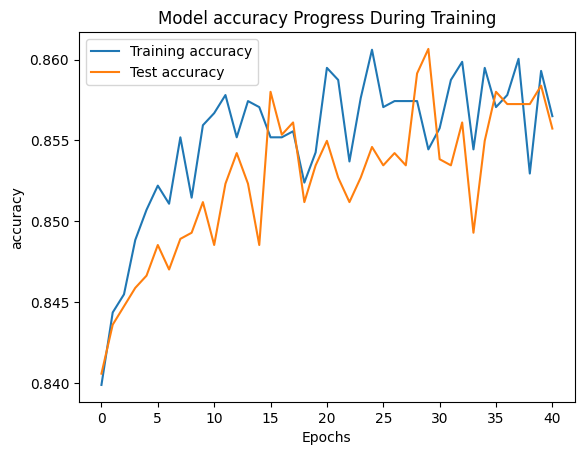

In [55]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.show()

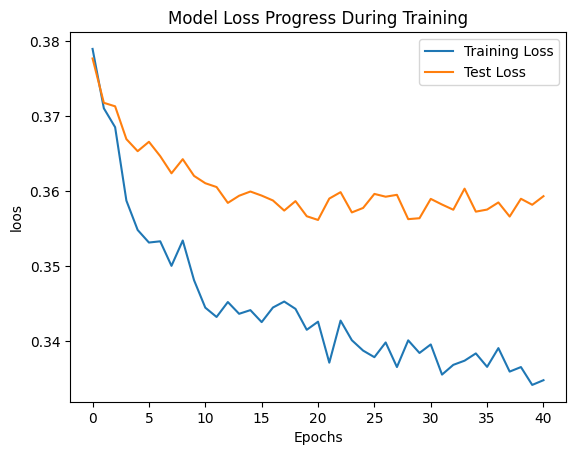

In [56]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('loos')
plt.legend(['Training Loss', 'Test Loss'])
plt.show()

In [57]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 472us/step


In [58]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

In [59]:
cm

array([[1545,   50],
       [ 218,  187]])

In [60]:
score = accuracy_score(y_pred, y_test)
score

0.866

In [61]:
#get weights

classifier.get_weights()

[array([[ 1.76239237e-01, -7.43848309e-02, -3.05104386e-02,
         -1.54370405e-02,  1.92296182e-04,  3.74238640e-01,
         -1.03551351e-01,  1.83679953e-01,  7.93656632e-02,
          2.67079920e-01, -1.66502930e-02],
        [-4.51649845e-01, -6.25144660e-01,  2.57848293e-01,
          7.41716087e-01,  5.80303073e-02, -7.56462872e-01,
         -2.80104488e-01, -7.93619305e-02, -6.03915513e-01,
         -3.49005073e-01, -3.60488564e-01],
        [ 1.46002188e-01, -8.98636058e-02, -1.08666107e-01,
          8.93647075e-02,  1.02736214e-02, -1.92560423e-02,
          4.26625498e-02,  2.20697731e-01,  3.41619141e-02,
         -2.47778953e-03,  2.80797988e-01],
        [-6.12119138e-01,  1.13846473e-01,  5.59581578e-01,
         -2.20193729e-01, -3.94890875e-01,  3.59442264e-01,
         -2.18644828e-01, -4.48292136e-01, -2.14502752e-01,
         -3.52804780e-01,  1.84339330e-01],
        [ 1.50615767e-01,  4.25314978e-02,  8.07314634e-01,
         -1.85635850e-01, -1.39129639e+00, -

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)